<a href="https://colab.research.google.com/github/sergiolms/saturday-ai/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression example

In [80]:
# Data manipulation
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Evaluation of models
from sklearn.metrics import mean_squared_error, r2_score

# Model implementation
from sklearn.linear_model import LinearRegression

# Load data (from a dataset in sklearn)
from sklearn.datasets import fetch_california_housing

# Save models into a file!
import pickle

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [75]:
# Obtain data
data = fetch_california_housing()

# See what can we do
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [76]:
# Obtain a description
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [77]:
# Creamos un dataframe u objeto de datos. Generamos un dataset o dataframe para poder trabajar con él
df = pd.DataFrame(data.data, columns=data.feature_names)
# Añadimos el objetivo o valores en la columna del dataset df en la columna median__house__value
df["median_house_value"] = data.target
# Mostramos la cabecera
df.head(5)
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,median_house_value
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [51]:

# Mostramos los datos.
# df.hist() para generar histogramas de histogramas de valores en las columnas.
# bins o intervalos en la visualización de cada dato. 20 bins significa que dividimos los datos en 20 intervalos para construir
df.hist(bins=20, figsize=(10,10))
# tight_layout(); --> Permite ajustar los datos sin superposiciones dentro del gráfico. Ajusta los espacios.
plt.tight_layout()

<IPython.core.display.Javascript object>

# First Model:

In [52]:
# Select some features
# Seleccionamos los datos
X = df[["MedInc","HouseAge"]]
Y = df["median_house_value"]


# Dividimos la información en datos de entrenamiento y datos de prueba.
# Entrenamiento para el algoritmo.
# Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=9)

In [53]:
# Create an instance of the Linear Regression model
reg = LinearRegression(fit_intercept=True, copy_X=True)

# Entrenamos el modelo
# Fit the data to the Linear Regression model (train the model)
reg.fit(X_train,Y_train)

LinearRegression()

In [54]:
# Determinamos el coficiente del modelo y lo representamos
# Determine the coeficients of the model
reg.coef_
pd.DataFrame(reg.coef_, index=X.columns, columns =["Coeficients"])



,Coeficients
MedInc,0.431509
HouseAge,0.017173


In [55]:
# Determine the intecept of the model
# Este parametro nos representa el punto en el eje y donde la linea de regresión
# corta con el eje x cuando todas las variables explicativas son cero.
reg.intercept_
pd.DataFrame([reg.intercept_], columns =["Intercept"])

,Intercept
0,-0.093104


In [56]:
#y = 0.431509*MedInc + 0.017173*HouseAge + -0.093104

In [57]:
# Now that the model has been trained, we can make predictions
predictions = reg.predict(X_test)

In [58]:
# To determine the performance of the model we can use some metrics

# Square root of the mean squared error:
test_rmse = np.sqrt(mean_squared_error(Y_test,predictions))

# Determination coeficient (R2)
test_r2sc = r2_score(Y_test, predictions)

# Remember the lower the value is the better it is
print("Square root of the mean squared error",test_rmse)


# The closer to one the better
print("Determination Coeficient",test_r2sc)

Square root of the mean squared error 0.8158350049867046
Determination Coeficient 0.5045069388606385


In [59]:
# Save the model into a file
with open("linear_regression_model_1.pkl","wb") as f:
    pickle.dump(reg,f)

# to use the model later, one can do:
#with open("linear_regression_model.pkl","rb") as f:
#    model = pickle.load(f)

In [62]:
%matplotlib inline

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

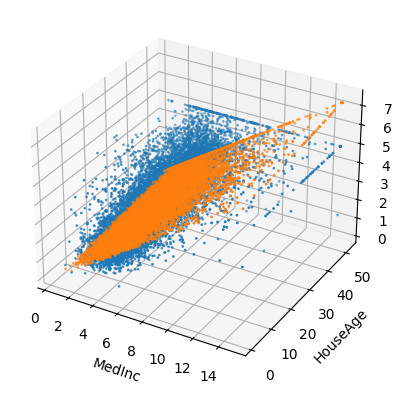

In [ ]:
# 3D visualization
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X.MedInc,X.HouseAge, Y, s=1)
ax.scatter(X.MedInc, X.HouseAge, reg.predict(X), s=1)
ax.set_xlabel("MedInc")
ax.set_ylabel("HouseAge")
ax.set_zlabel("median_house_value")
plt.show()
#ax.plot_trisurf(X.LSTAT, X.RM, reg.predict(X),linewidth=0,color='orange')

# Second Model

In [64]:
# Use all features
X2 = df.drop('median_house_value',axis=1)
Y2 = df["median_house_value"]

# Split the data into test and train
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2,Y2, test_size=0.2, random_state=10)

In [65]:
# Create an instance of the Linear Regression model
reg2 = LinearRegression()

# Fit the data to the Linear Regression model
reg2.fit(X2_train,Y2_train)

LinearRegression()

In [66]:
# Now that the model has been trained, we can make predictions
predictions2 = reg2.predict(X2_test)

In [67]:
# Model Performance

test_rmse2 = np.sqrt(mean_squared_error(Y2_test,predictions2))
test_r2sc2 = r2_score(Y2_test,predictions2)

# Remember the lower the value is the better it is
print("Square root of the mean squared error",test_rmse2)

# The closer to one the better
print("Determination Coeficient",test_r2sc2)

Square root of the mean squared error 0.737891734750625
Determination Coeficient 0.6009790143129111


In [68]:
# Determine the coeficients
pd.DataFrame(reg2.coef_, index=X2.columns, columns =["Coeficients"]).sort_values("Coeficients")

,Coeficients
Longitude,-0.441484
Latitude,-0.429077
AveRooms,-0.100333
AveOccup,-0.004782
Population,-0.000003
HouseAge,0.009324
MedInc,0.433102
AveBedrms,0.615219


In [69]:
# Determine the intercept
pd.DataFrame([reg2.intercept_], columns =["Intercept"])

,Intercept
0,-37.486966


In [70]:
# Save the model into a file: (your turn)

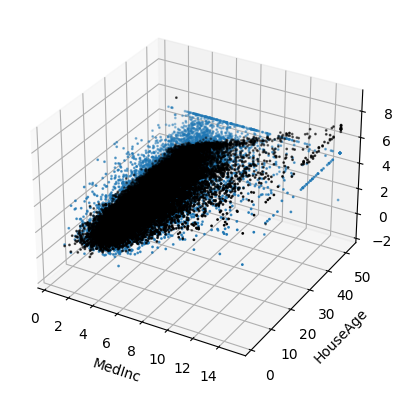

In [73]:
# 3D visualization

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X2.MedInc,X2.HouseAge, Y2, s=1)
ax.scatter(X2.MedInc, X2.HouseAge, reg2.predict(X2), s=1, c="black")

ax.set_xlabel("MedInc")
ax.set_ylabel("HouseAge")
ax.set_zlabel("median_house_value")
plt.show()

# Hands-On Exploration:

In [91]:
#**Data Set Characteristics:**
#    :Number of Instances: 20640
#    :Number of Attributes: 8 numeric, predictive attributes and the target
#    :Attribute Information:
#        - MedInc        median income in block group
#        - HouseAge      median house age in block group
#        - AveRooms      average number of rooms per household
#        - AveBedrms     average number of bedrooms per household
#        - Population    block group population
#        - AveOccup      average number of household members
#        - Latitude      block group latitude
#        - Longitude     block group longitude

# Select some features
# Seleccionamos los datos
X = df[["AveRooms","MedInc", "Longitude", "Latitude"]]
Y = df["median_house_value"]


# Dividimos la información en datos de entrenamiento y datos de prueba.
# Entrenamiento para el algoritmo.
# Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=9)

In [92]:
# Create an instance of the Linear Regression model
reg = LinearRegression(fit_intercept=True, copy_X=True)

# Entrenamos el modelo
# Fit the data to the Linear Regression model (train the model)
reg.fit(X_train,Y_train)

LinearRegression()

In [93]:
# Determinamos el coficiente del modelo y lo representamos
# Determine the coeficients of the model
reg.coef_
pd.DataFrame(reg.coef_, index=X.columns, columns =["Coeficients"])



,Coeficients
AveRooms,0.018628
MedInc,0.357039
Longitude,-0.510415
Latitude,-0.497174


In [94]:
# Determine the intecept of the model
# Este parametro nos representa el punto en el eje y donde la linea de regresión
# corta con el eje x cuando todas las variables explicativas son cero.
reg.intercept_
pd.DataFrame([reg.intercept_], columns =["Intercept"])

,Intercept
0,-42.728914


In [ ]:
#y = 0.431509*MedInc + 0.017173*HouseAge + -0.093104

In [95]:
# Now that the model has been trained, we can make predictions
predictions = reg.predict(X_test)

In [96]:
# To determine the performance of the model we can use some metrics

# Square root of the mean squared error:
test_rmse = np.sqrt(mean_squared_error(Y_test,predictions))

# Determination coeficient (R2)
test_r2sc = r2_score(Y_test, predictions)

# Remember the lower the value is the better it is
print("Square root of the mean squared error",test_rmse)


# The closer to one the better
print("Determination Coeficient",test_r2sc)

Square root of the mean squared error 0.7523675788787791
Determination Coeficient 0.5786014363383228


In [97]:
# Save the model into a file
with open("linear_regression_model_1.pkl","wb") as f:
    pickle.dump(reg,f)

# to use the model later, one can do:
#with open("linear_regression_model.pkl","rb") as f:
#    model = pickle.load(f)

In [98]:
%matplotlib inline

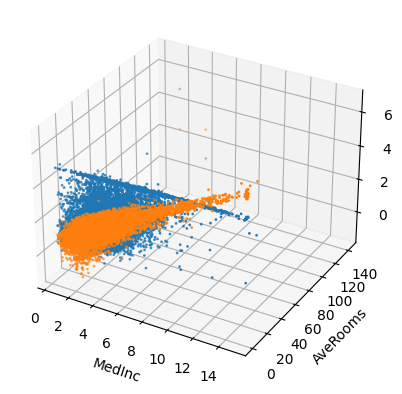

In [99]:
# 3D visualization
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X.MedInc,X.AveRooms, Y, s=1)
ax.scatter(X.MedInc, X.Latitude, reg.predict(X), s=1)
ax.set_xlabel("MedInc")
ax.set_ylabel("Latitude")
ax.set_zlabel("median_house_value")
plt.show()
#ax.plot_trisurf(X.LSTAT, X.RM, reg.predict(X),linewidth=0,color='orange')